In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train[0].shape

(32, 32, 3)

In [6]:
x_train = x_train/255

In [7]:
y_train = y_train/255

In [8]:
 y_train = y_train*255

In [9]:
x_test = x_test/255

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_cat_train = to_categorical(y_train)

In [12]:
y_cat_test = to_categorical(y_test)

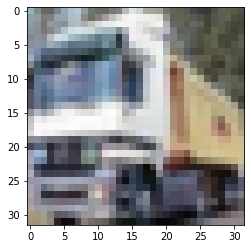

In [13]:
plt.imshow(x_train[1])

In [14]:
from tensorflow.keras.models import Sequential

In [15]:
from tensorflow.keras.layers import Dense,Conv2D, MaxPool2D,Flatten

In [16]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [18]:
 from tensorflow.keras.callbacks import EarlyStopping

In [19]:
earlystop = EarlyStopping(monitor='val_loss',patience=2)

In [20]:
model.fit(x_train,y_cat_train,epochs=15,validation_data =(x_test,y_cat_test),callbacks=[earlystop])

Epoch 1/15
1563/1563 [==============================] - 28s 18ms/step - loss: 1.4812 - accuracy: 0.4639 - val_loss: 1.3123 - val_accuracy: 0.5448
Epoch 2/15
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1482 - accuracy: 0.5951 - val_loss: 1.1016 - val_accuracy: 0.6138
Epoch 3/15
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0061 - accuracy: 0.6474 - val_loss: 0.9936 - val_accuracy: 0.6573
Epoch 4/15
1563/1563 [==============================] - 26s 17ms/step - loss: 0.9026 - accuracy: 0.6838 - val_loss: 1.0120 - val_accuracy: 0.6474
Epoch 5/15
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8177 - accuracy: 0.7132 - val_loss: 0.9400 - val_accuracy: 0.6791
Epoch 6/15
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7454 - accuracy: 0.7386 - val_loss: 0.9706 - val_accuracy: 0.6685
Epoch 7/15
1563/1563 [==============================] - 26s 17ms/step - loss: 0.6819 - accuracy: 0.7605 - val_loss: 0.9549 -

In [21]:
loss = pd.DataFrame(model.history.history)

In [22]:
loss

,loss,accuracy,val_loss,val_accuracy
0,1.481161,0.46392,1.312301,0.5448
1,1.148210,0.59510,1.101599,0.6138
2,1.006091,0.64742,0.993633,0.6573
3,0.902551,0.68382,1.011973,0.6474
4,0.817710,0.71316,0.940049,0.6791
5,0.745403,0.73862,0.970593,0.6685
6,0.681854,0.76052,0.954914,0.6843


In [23]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.9549137949943542, 0.6843000054359436]

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
predicts = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [26]:
print(classification_report(y_test,predicts))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73      1000
           1       0.84      0.75      0.79      1000
           2       0.64      0.48      0.54      1000
           3       0.47      0.50      0.49      1000
           4       0.64      0.62      0.63      1000
           5       0.56      0.64      0.60      1000
           6       0.72      0.79      0.75      1000
           7       0.79      0.70      0.74      1000
           8       0.75      0.84      0.79      1000
           9       0.75      0.76      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



<AxesSubplot:>

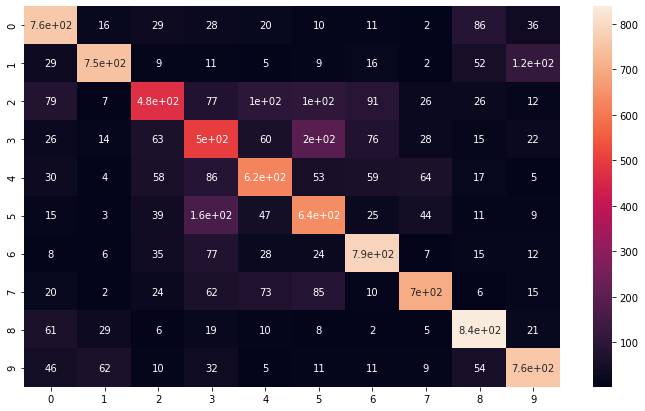

In [27]:
import seaborn as sns

plt.figure(figsize=(12,7))
sns.heatmap(confusion_matrix(y_test,predicts),annot=True)

In [28]:
my_image = x_test[9]

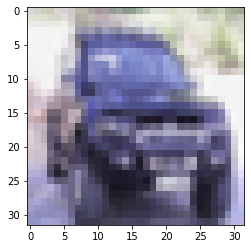

In [29]:
plt.imshow(my_image)

In [30]:
prediction = model.predict_classes(my_image.reshape(1,32,32,3))

In [31]:
prediction

array([1], dtype=int64)

In [40]:
dict = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

In [69]:
master_dataset.rename(columns = {0:'Object'},inplace = True)

In [64]:
master_dataset['array'] = range(10)

In [70]:
master_dataset

,Object,array
0,airplane,0
1,automobile,1
2,bird,2
3,cat,3
4,deer,4
5,dog,5
6,frog,6
7,horse,7
8,ship,8
9,truck,9


In [72]:
prediction

array([1], dtype=int64)

In [75]:
def prediction_conversion_to_object(prediction):
    for arr in master_dataset['array']:
        if arr == prediction:
            return master_dataset.iloc[arr]['Object']

In [76]:
ast = np.array(3)

In [77]:
prediction_conversion_to_object(ast)

'cat'

In [80]:
def prediction_image(image):
    
    prediction = model.predict_classes(image.reshape(1,32,32,3))
    return prediction_conversion_to_object(prediction)

In [81]:
my_im = x_test[900]

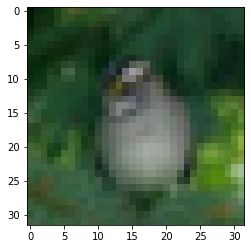

In [82]:
plt.imshow(my_im)

In [83]:
prediction_image(my_im)

'bird'